# MSDM5003 Assignment3
__name__: LIU Jingting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part a
First use a lambda function to define $s_{0}(x)$, then take 1000 uniformly distributed points and calculate the integral. Plot the result of numerical computation and theoretical analysis together in one figure, we can see that they match.

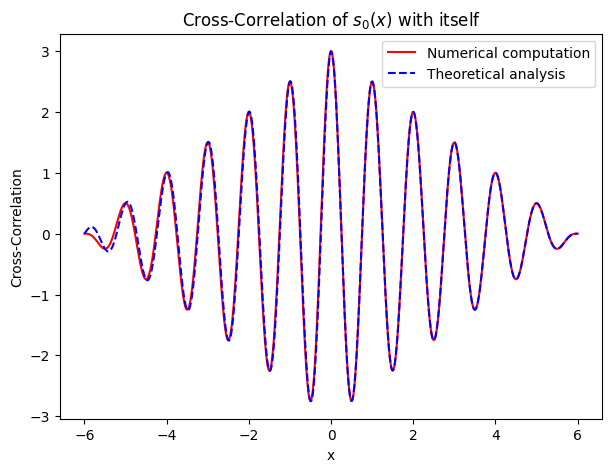

In [2]:
s0 = lambda x: np.sin(2 * np.pi * x) * (np.abs(x) <= 3)

def cross_correlation(x, step=0.01):
    y_vals = np.arange(-3, 3, step)
    return np.sum(s0(y_vals) * s0(y_vals + x)) * step

def compute_cross_correlation():
    x_vals = np.linspace(-6, 6, 1000)
    cross_corr_vals = [cross_correlation(x) for x in x_vals]
    
    theoretical_f = lambda x: (((6 - np.abs(x)) / 2) * np.cos(2 * np.pi * x) + (1 / (np.pi * 4)) * np.sin(2 * np.pi * x)) * (np.abs(x) <= 6)
    theoretical_vals = theoretical_f(x_vals)
    
    plt.figure(figsize=(7,5))
    plt.plot(x_vals, cross_corr_vals, color='r', label='Numerical computation', linestyle='-')
    plt.plot(x_vals, theoretical_vals, color='b', label='Theoretical analysis', linestyle='--')
    plt.title('Cross-Correlation of $s_0(x)$ with itself')
    plt.xlabel('x')
    plt.ylabel('Cross-Correlation')
    plt.legend()
    plt.savefig('plots/Part_a.png')
    plt.show()
    

compute_cross_correlation()

## Part b
The convolution numerical computation is carried out as follows.

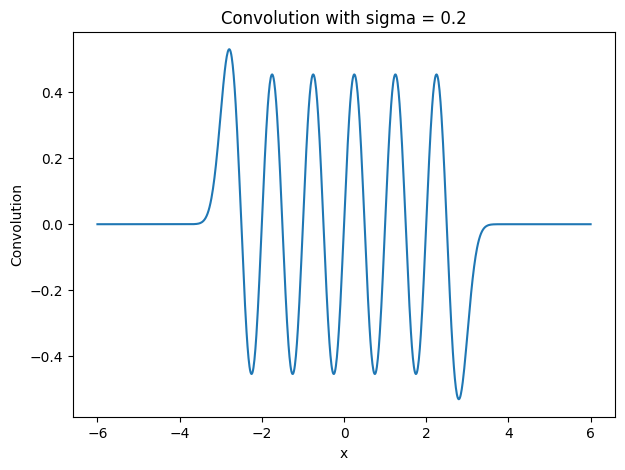

In [3]:
# hyperparameters
p = lambda x: np.sin(20 * np.pi * x) * (np.abs(x) <= 3) 
s = lambda x: s0(x) + p(x)
r = lambda x, sigma: (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-x**2 / (2 * sigma**2))

def convolution(x, sigma, step=0.01):
    y_vals = np.arange(-3, 3, step)
    return np.sum(s(y_vals) * r(x - y_vals, sigma)) * step

def compute_convolution(sigma=0.2):
    x_vals = np.linspace(-6, 6, 1000)
    convolution_vals = [convolution(x, sigma) for x in x_vals]

    plt.figure(figsize=(7,5))
    plt.plot(x_vals, convolution_vals)
    plt.title(f'Convolution with sigma = {sigma}')
    plt.xlabel('x')
    plt.ylabel('Convolution')
    plt.savefig(f'plots/Part_b(sigma={sigma}).png')
    plt.show()
    
compute_convolution()

We can explore the influence of $\sigma$ on convolution value using the following code. We can see from the plots that as $sigma$ increases, the convolution value tend to become a linear function of $x$.

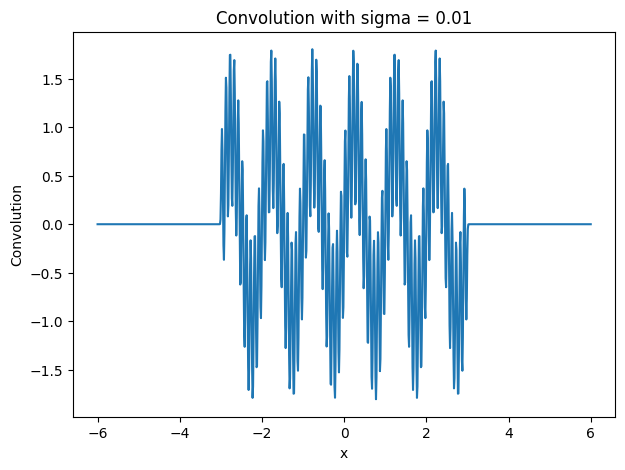

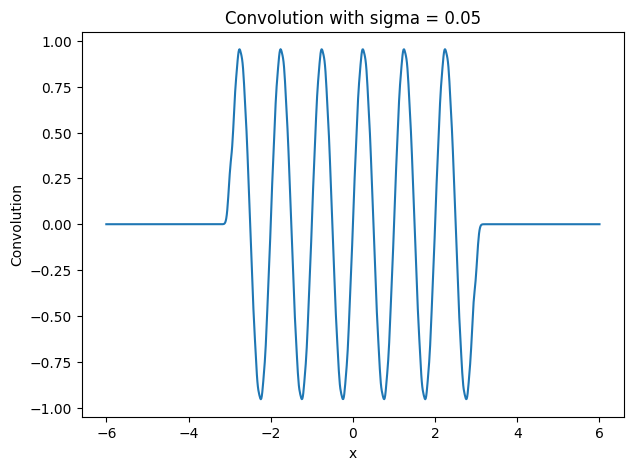

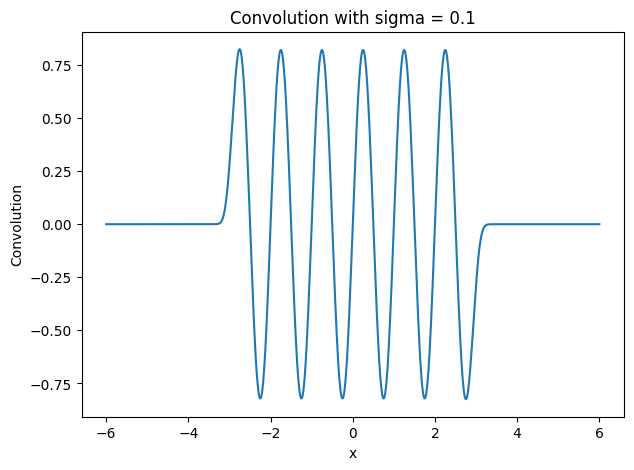

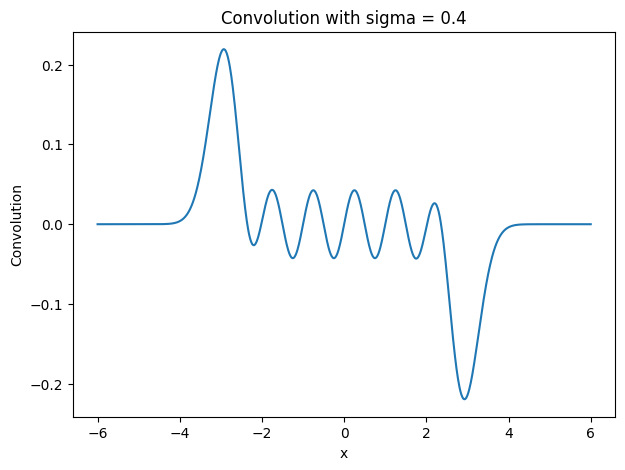

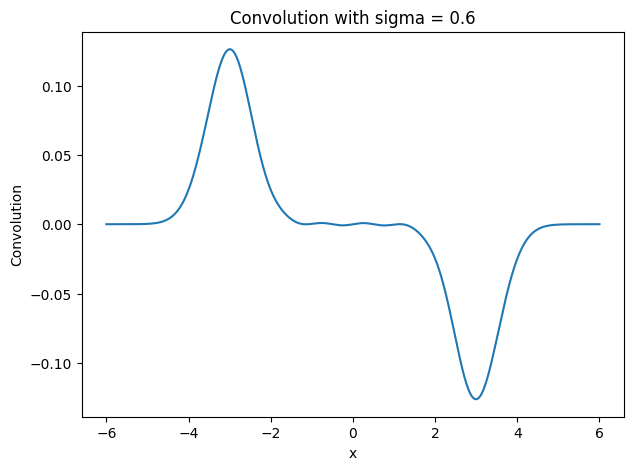

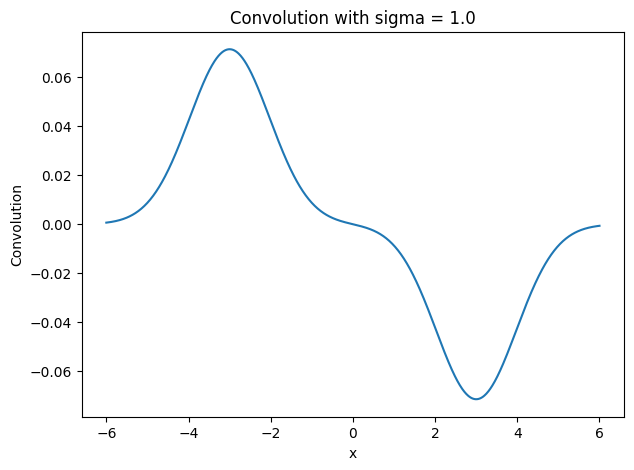

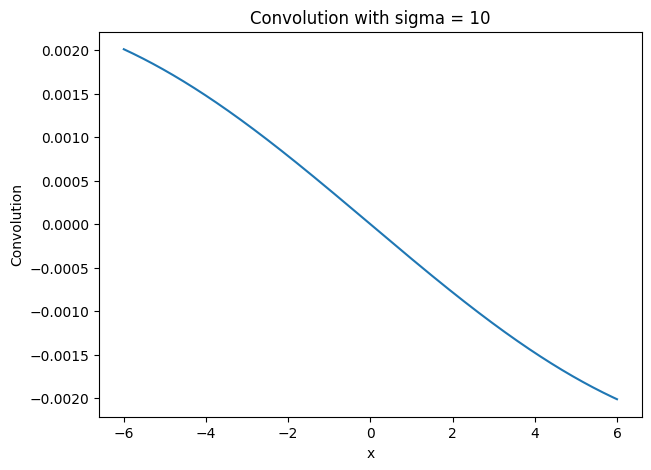

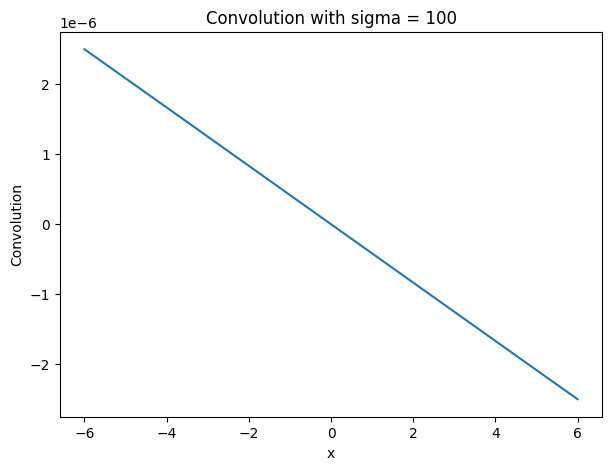

In [4]:
for val in [0.01, 0.05, 0.1, 0.4, 0.6, 1.0, 10, 100]:
    compute_convolution(val)

We can also try to compute the integral using scipy, to get a function in terms of $x$ using the `integrate()` function provided by `sympy`.

In [5]:
import sympy as sp

def compute_symbolic_convolution(sigma=0.2):
    y, x = sp.symbols('y x')
    r = (1 / (sigma * sp.sqrt(2 * sp.pi))) * sp.exp(-x**2 / (2 * sigma**2))  # define the response function
    s = sp.Piecewise(
        (sp.sin(2 * sp.pi * y) + sp.sin(20 * sp.pi * y), (y >= -3) & (y <= 3)),
        (0, True)
    )   # define the piecewise function
    convolution_expr = sp.integrate(s * r.subs(x, x - y), (y, -3, 3))   # calculate the convolution expression
    print("Symbolic expression of convolution(s * r)(x):")
    sp.pprint(convolution_expr)


compute_symbolic_convolution()

Symbolic expression of convolution(s * r)(x):
         ⎛-3                                     -3                                   ⎞                    ⎛3          ↪
         ⎜⌠                                      ⌠                                    ⎟                    ⎜⌠          ↪
         ⎜⎮          2                           ⎮          2                         ⎟         2          ⎜⎮          ↪
         ⎜⎮   -12.5⋅y   25.0⋅x⋅y                 ⎮   -12.5⋅y   25.0⋅x⋅y               ⎟  -12.5⋅x           ⎜⎮  -12.5⋅y ↪
  2.5⋅√2⋅⎜⎮  ℯ        ⋅ℯ        ⋅sin(2⋅π⋅y) dy + ⎮  ℯ        ⋅ℯ        ⋅sin(20⋅π⋅y) dy⎟⋅ℯ           2.5⋅√2⋅⎜⎮ ℯ        ↪
         ⎜⌡                                      ⌡                                    ⎟                    ⎜⌡          ↪
         ⎝                                                                            ⎠                    ⎝           ↪
- ─────────────────────────────────────────────────────────────────────────────────────────────── + ───────